In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import cleaning_functions as clean

In [2]:
data = pd.read_csv("Code_challenge_train.csv")

In [3]:
data = clean.cleaning(data)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
X = data.drop(['y'], axis = 1)
y = data['y']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 72019)

In [7]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [10]:
# from keras.metrics import binary_accuracy

In [11]:
def run_model(nodes, epk, btch):
    
    """
    Parameters:
    -----------
    nodes: Goes in Dense layer, how many nodes you want. 
    epk: number of epochs, goes in training the model part
    btch: batch_size, goes in training the model part.
    """
    
    model = Sequential()
    
    # input
    model.add(Dense(nodes, activation = 'relu', input_shape = (X_train.shape[1], )))

    # one hidden layer
    model.add(Dense(nodes, activation = 'relu'))

    # output layer
    model.add(Dense(1, activation = 'sigmoid'))

    # compile
    model.compile(optimizer = 'adam', 
                 loss = 'binary_crossentropy', 
                 metrics = ['accuracy'])
    
    history = model.fit(X_train, y_train,
                   epochs = epk, 
                   batch_size = btch, 
                   validation_data = (X_test, y_test))
    
    return history

In [33]:
def plot_loss_acc(history):
    
    """
    Needs the outcome of run_model() as input.
    Plots accuracy and loss over training and validation
    """
    
#     loss_values = history.history['loss']
#     val_loss_values = history.history['val_loss']

    epochs = range(1, len(history.history['loss']) + 1)

    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
    ax[0].plot(epochs, history.history['loss'], 'bo', label = 'training loss'.title())
    ax[0].plot(epochs, history.history['val_loss'], 'b', label = 'validation loss'.title())
    ax[0].set_title('Training and Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_xticks(ticks = epochs)
    ax[0].legend();
    
    
    # plotting the values of the accuracy of training and validation
    epochs = range(1, len(history.history['acc']) + 1)
    
    ax[1].plot(epochs, history.history['acc'], 'bo', label = 'training accuracy'.title())
    ax[1].plot(epochs, history.history['val_acc'], 'b', label = 'validation accuracy'.title())
    ax[1].set_title('Training and Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_xticks(ticks = epochs)
    ax[1].set_ylabel('Accuracy')
    ax[1].legend();

In [46]:
# try 16 nodes, 20 epochs, 512 batch_size
# reduce epochs to 10 if overfitting

# try 32 nodes, then variations. we're trying to beat 98.32% we got in SVM

In [13]:
hist_1 = run_model(16, 10, 128)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 1s 48us/step - loss: 0.4212 - acc: 0.8156 - val_loss: 0.2960 - val_acc: 0.8800
Epoch 2/10
30000/30000 [==============================] - 1s 22us/step - loss: 0.2401 - acc: 0.9054 - val_loss: 0.2082 - val_acc: 0.9193
Epoch 3/10
30000/30000 [==============================] - 1s 27us/step - loss: 0.1714 - acc: 0.9383 - val_loss: 0.1608 - val_acc: 0.9405
Epoch 4/10
30000/30000 [==============================] - 1s 21us/step - loss: 0.1302 - acc: 0.9559 - val_loss: 0.1318 - val_acc: 0.9543
Epoch 5/10
30000/30000 [==============================] - 1s 21us/step - loss: 0.1052 - acc: 0.9664 - val_loss: 0.1139 - val_acc: 0.9636
Epoch 6/10
30000/30000 [==============================] - 1s 27us/step - loss: 0.0894 - acc: 0.9728 - val_loss: 0.1084 - val_acc: 0.9658
Epoch 7/

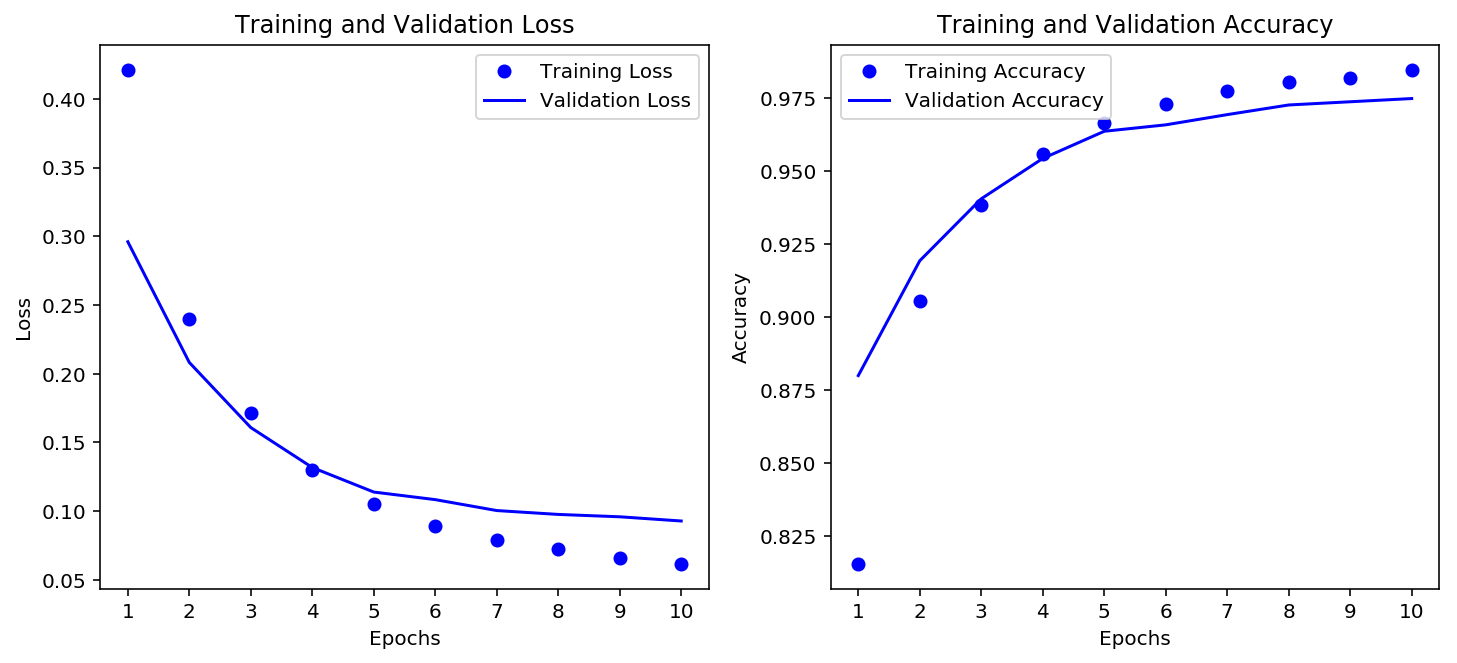

In [34]:
plot_loss_acc(hist_1)

In [35]:
hist_2 = run_model(32, 10, 128)

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 2s 56us/step - loss: 0.3584 - acc: 0.8421 - val_loss: 0.2319 - val_acc: 0.9100
Epoch 2/10
30000/30000 [==============================] - 1s 24us/step - loss: 0.1786 - acc: 0.9355 - val_loss: 0.1531 - val_acc: 0.9463
Epoch 3/10
30000/30000 [==============================] - 1s 30us/step - loss: 0.1163 - acc: 0.9618 - val_loss: 0.1145 - val_acc: 0.9639
Epoch 4/10
30000/30000 [==============================] - 1s 24us/step - loss: 0.0862 - acc: 0.9747 - val_loss: 0.0999 - val_acc: 0.9695
Epoch 5/10
30000/30000 [==============================] - 1s 24us/step - loss: 0.0703 - acc: 0.9814 - val_loss: 0.0939 - val_acc: 0.9730
Epoch 6/10
30000/30000 [==============================] - 1s 31us/step - loss: 0.0602 - acc: 0.9850 - val_loss: 0.0904 - val_acc: 0.9782
Epoch 7/10
30000/30000 [==============================] - 1s 24us/step - loss: 0.0533 - acc: 0.9876 - val_loss: 0.0884 - val_acc

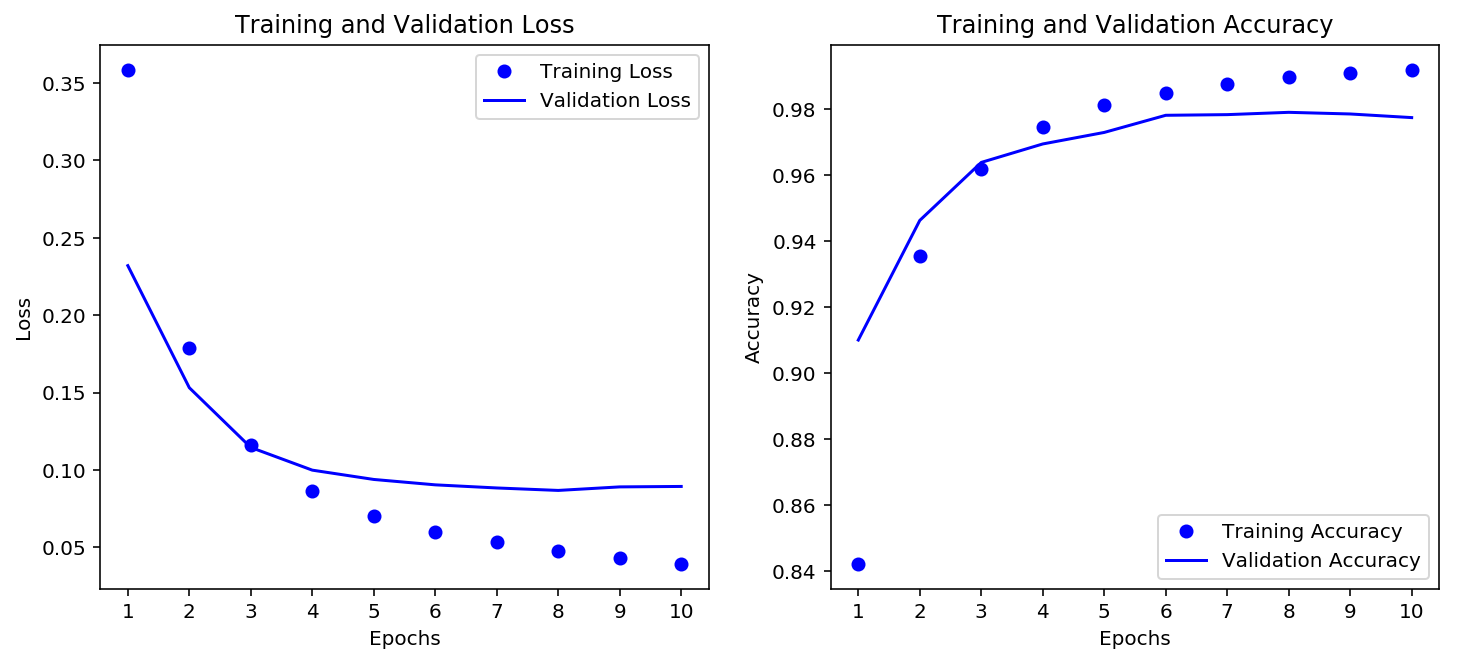

In [36]:
plot_loss_acc(hist_2)

It's overfitting worse than the model before. Tweaking some more below

In [37]:
hist_3 = run_model(32, 10, 512)

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 1s 40us/step - loss: 0.4898 - acc: 0.7797 - val_loss: 0.4110 - val_acc: 0.8048
Epoch 2/10
30000/30000 [==============================] - 0s 9us/step - loss: 0.3556 - acc: 0.8403 - val_loss: 0.2970 - val_acc: 0.8797
Epoch 3/10
30000/30000 [==============================] - 0s 9us/step - loss: 0.2514 - acc: 0.9022 - val_loss: 0.2237 - val_acc: 0.9145
Epoch 4/10
30000/30000 [==============================] - 0s 15us/step - loss: 0.1911 - acc: 0.9297 - val_loss: 0.1802 - val_acc: 0.9322
Epoch 5/10
30000/30000 [==============================] - 0s 9us/step - loss: 0.1512 - acc: 0.9473 - val_loss: 0.1492 - val_acc: 0.9464
Epoch 6/10
30000/30000 [==============================] - 0s 9us/step - loss: 0.1217 - acc: 0.9591 - val_loss: 0.1278 - val_acc: 0.9576
Epoch 7/10
30000/30000 [==============================] - 0s 9us/step - loss: 0.1006 - acc: 0.9696 - val_loss: 0.1126 - val_acc: 0.9

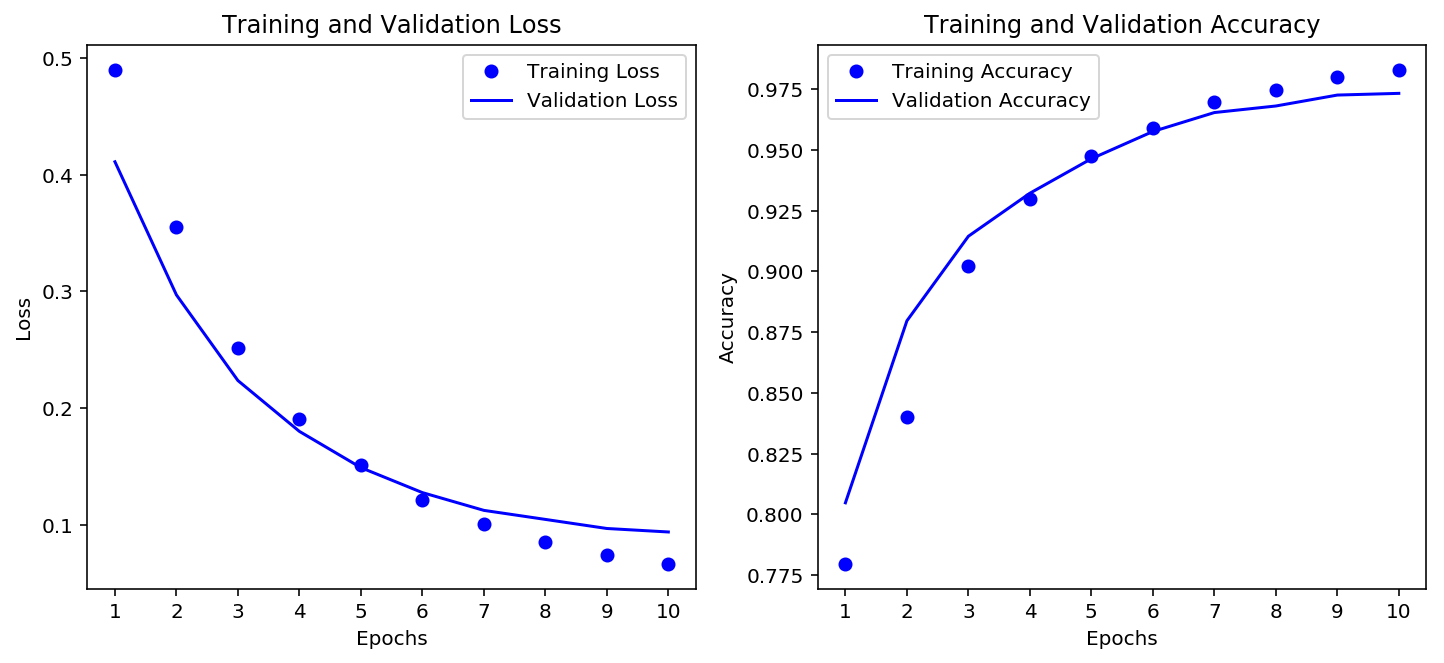

In [38]:
plot_loss_acc(hist_3)

In [39]:
hist_4 = run_model(64, 10, 1024)

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 1s 42us/step - loss: 0.4462 - acc: 0.8095 - val_loss: 0.3538 - val_acc: 0.8456
Epoch 2/10
30000/30000 [==============================] - 0s 8us/step - loss: 0.2974 - acc: 0.8812 - val_loss: 0.2543 - val_acc: 0.8993
Epoch 3/10
30000/30000 [==============================] - 0s 14us/step - loss: 0.2225 - acc: 0.9132 - val_loss: 0.2115 - val_acc: 0.9183
Epoch 4/10
30000/30000 [==============================] - 0s 8us/step - loss: 0.1797 - acc: 0.9343 - val_loss: 0.1799 - val_acc: 0.9330
Epoch 5/10
30000/30000 [==============================] - 0s 8us/step - loss: 0.1460 - acc: 0.9496 - val_loss: 0.1518 - val_acc: 0.9455
Epoch 6/10
30000/30000 [==============================] - 0s 8us/step - loss: 0.1181 - acc: 0.9622 - val_loss: 0.1308 - val_acc: 0.9554
Epoch 7/10
30000/30000 [==============================] - 0s 8us/step - loss: 0.0978 - acc: 0.9717 - val_loss: 0.1175 - val_acc: 0.9

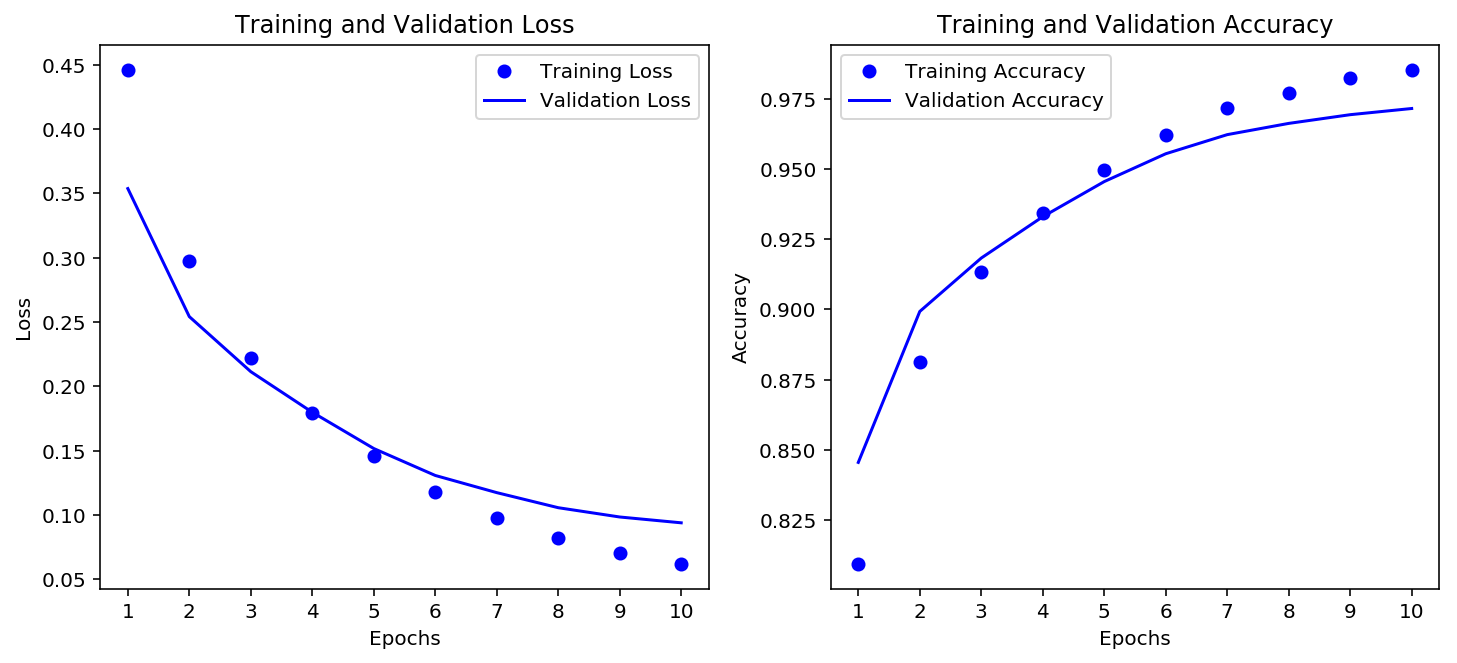

In [40]:
plot_loss_acc(hist_4)

In [44]:
def run_model_2hidden(nodes, epk, btch):
    
    """
    Parameters:
    -----------
    nodes: Goes in Dense layer, how many nodes you want. 
    epk: number of epochs, goes in training the model part
    btch: batch_size, goes in training the model part.
    """
    
    model = Sequential()
    
    # input
    model.add(Dense(nodes, activation = 'relu', input_shape = (X_train.shape[1], )))

    # one hidden layer
    model.add(Dense(nodes, activation = 'relu'))
    
    # second hidden layer
    model.add(Dense(nodes, activation = 'relu'))

    # output layer
    model.add(Dense(1, activation = 'sigmoid'))

    # compile
    model.compile(optimizer = 'adam', 
                 loss = 'binary_crossentropy', 
                 metrics = ['accuracy'])
    
    history = model.fit(X_train, y_train,
                   epochs = epk, 
                   batch_size = btch, 
                   validation_data = (X_test, y_test))
    
    return history

In [45]:
hist_5 = run_model_2hidden(32, 10, 512)

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 2s 50us/step - loss: 0.4696 - acc: 0.7968 - val_loss: 0.3980 - val_acc: 0.8014
Epoch 2/10
30000/30000 [==============================] - 0s 16us/step - loss: 0.3165 - acc: 0.8597 - val_loss: 0.2525 - val_acc: 0.9015
Epoch 3/10
30000/30000 [==============================] - 0s 10us/step - loss: 0.2065 - acc: 0.9225 - val_loss: 0.1915 - val_acc: 0.9288
Epoch 4/10
30000/30000 [==============================] - 0s 10us/step - loss: 0.1539 - acc: 0.9452 - val_loss: 0.1578 - val_acc: 0.9435
Epoch 5/10
30000/30000 [==============================] - 0s 10us/step - loss: 0.1214 - acc: 0.9586 - val_loss: 0.1367 - val_acc: 0.9537
Epoch 6/10
30000/30000 [==============================] - 0s 10us/step - loss: 0.1000 - acc: 0.9688 - val_loss: 0.1235 - val_acc: 0.9589
Epoch 7/10
30000/30000 [==============================] - 0s 10us/step - loss: 0.0855 - acc: 0.9740 - val_loss: 0.1107 - val_acc

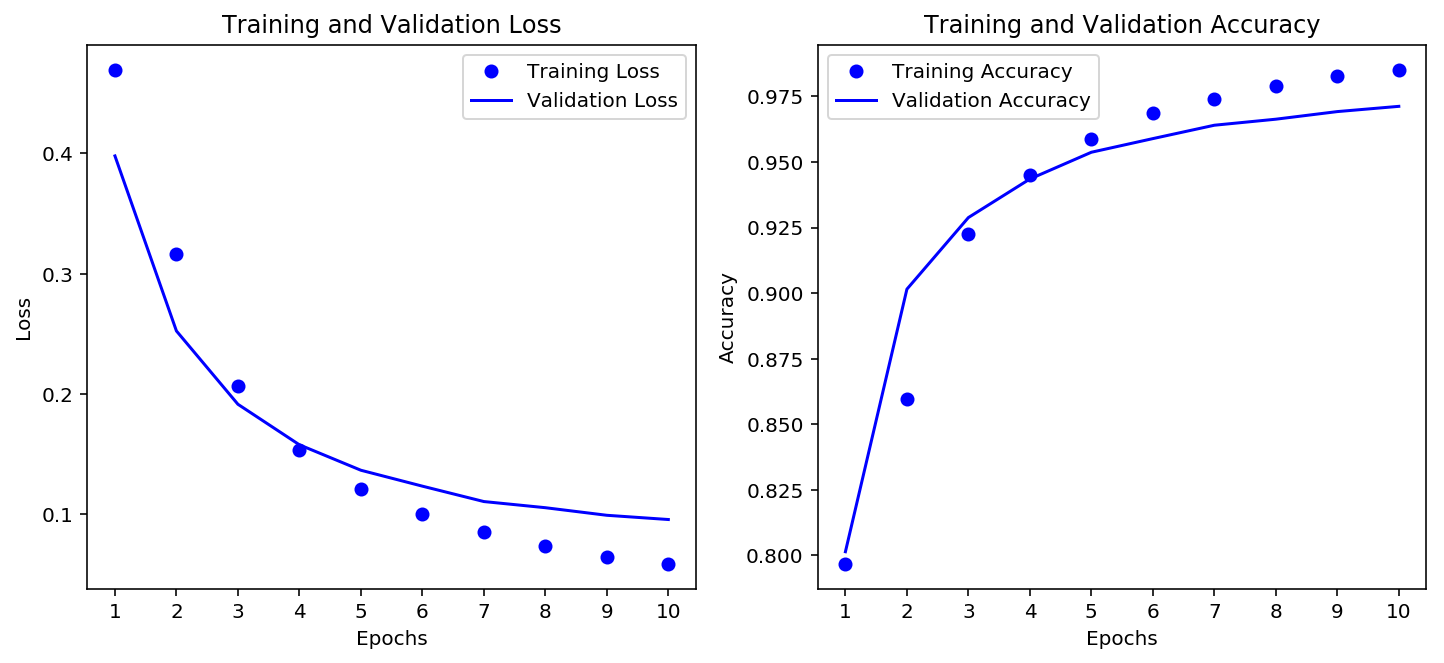

In [46]:
plot_loss_acc(hist_5)

It's doing worse than with one hidden layer, it's overfitting. Compare to the best model we had so far:

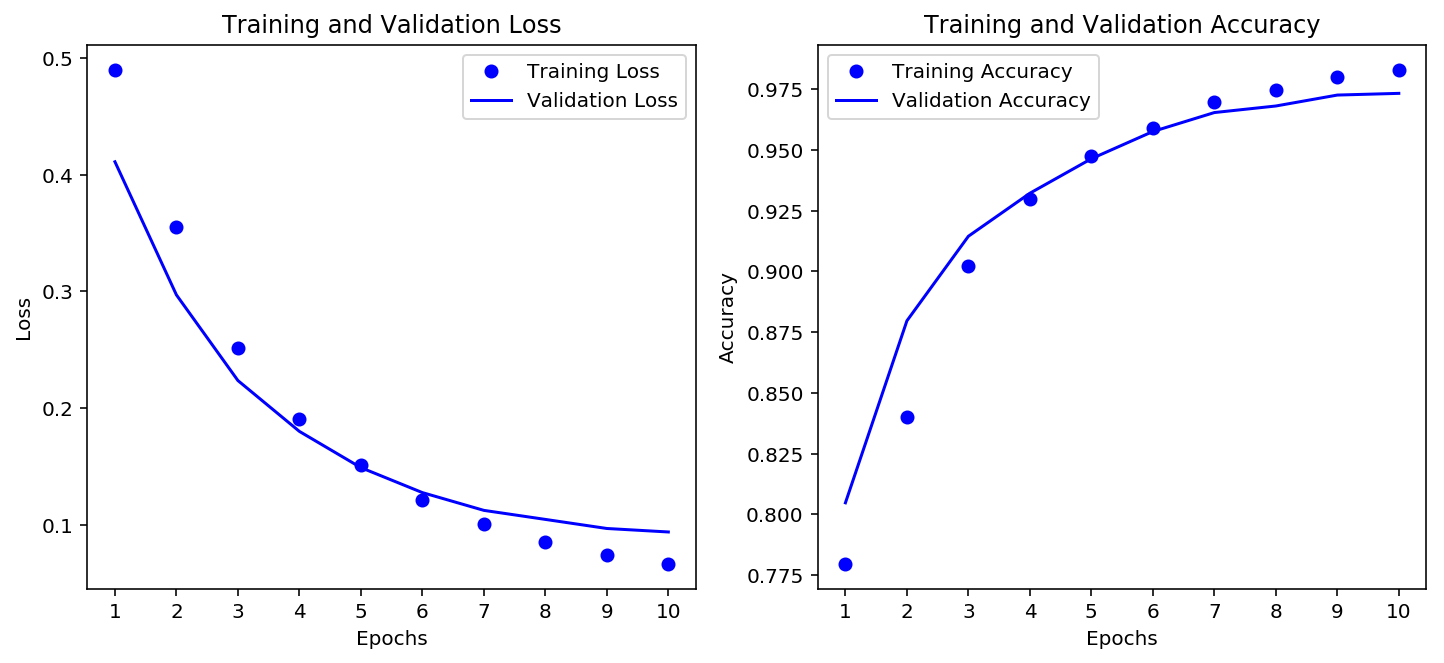

In [47]:
plot_loss_acc(hist_3)

Best accuracy on validation set, was in hist_3 with 97.33% It's is overfitting a little after the 6th epoch. I'll make the cut at the 6th epoch, and see how much worse the accuracy would be

In [48]:
hist_3_2 = run_model(32, 6, 512)

Train on 30000 samples, validate on 10000 samples
Epoch 1/6
30000/30000 [==============================] - 2s 51us/step - loss: 0.5896 - acc: 0.6828 - val_loss: 0.4281 - val_acc: 0.8057
Epoch 2/6
30000/30000 [==============================] - 0s 9us/step - loss: 0.3663 - acc: 0.8352 - val_loss: 0.3204 - val_acc: 0.8658
Epoch 3/6
30000/30000 [==============================] - 0s 9us/step - loss: 0.2737 - acc: 0.8926 - val_loss: 0.2501 - val_acc: 0.9029
Epoch 4/6
30000/30000 [==============================] - 0s 9us/step - loss: 0.2157 - acc: 0.9192 - val_loss: 0.2083 - val_acc: 0.9210
Epoch 5/6
30000/30000 [==============================] - 0s 9us/step - loss: 0.1767 - acc: 0.9376 - val_loss: 0.1769 - val_acc: 0.9352
Epoch 6/6
30000/30000 [==============================] - 0s 9us/step - loss: 0.1460 - acc: 0.9509 - val_loss: 0.1513 - val_acc: 0.9469


In [49]:
hist_3_3 = run_model(64, 6, 512)

Train on 30000 samples, validate on 10000 samples
Epoch 1/6
30000/30000 [==============================] - 2s 50us/step - loss: 0.4537 - acc: 0.7907 - val_loss: 0.3437 - val_acc: 0.8451
Epoch 2/6
30000/30000 [==============================] - 0s 11us/step - loss: 0.2723 - acc: 0.8903 - val_loss: 0.2258 - val_acc: 0.9142
Epoch 3/6
30000/30000 [==============================] - 0s 11us/step - loss: 0.1894 - acc: 0.9289 - val_loss: 0.1736 - val_acc: 0.9370
Epoch 4/6
30000/30000 [==============================] - 1s 17us/step - loss: 0.1386 - acc: 0.9517 - val_loss: 0.1358 - val_acc: 0.9543
Epoch 5/6
30000/30000 [==============================] - 0s 11us/step - loss: 0.1022 - acc: 0.9679 - val_loss: 0.1107 - val_acc: 0.9643
Epoch 6/6
30000/30000 [==============================] - 0s 11us/step - loss: 0.0790 - acc: 0.9781 - val_loss: 0.0969 - val_acc: 0.9698


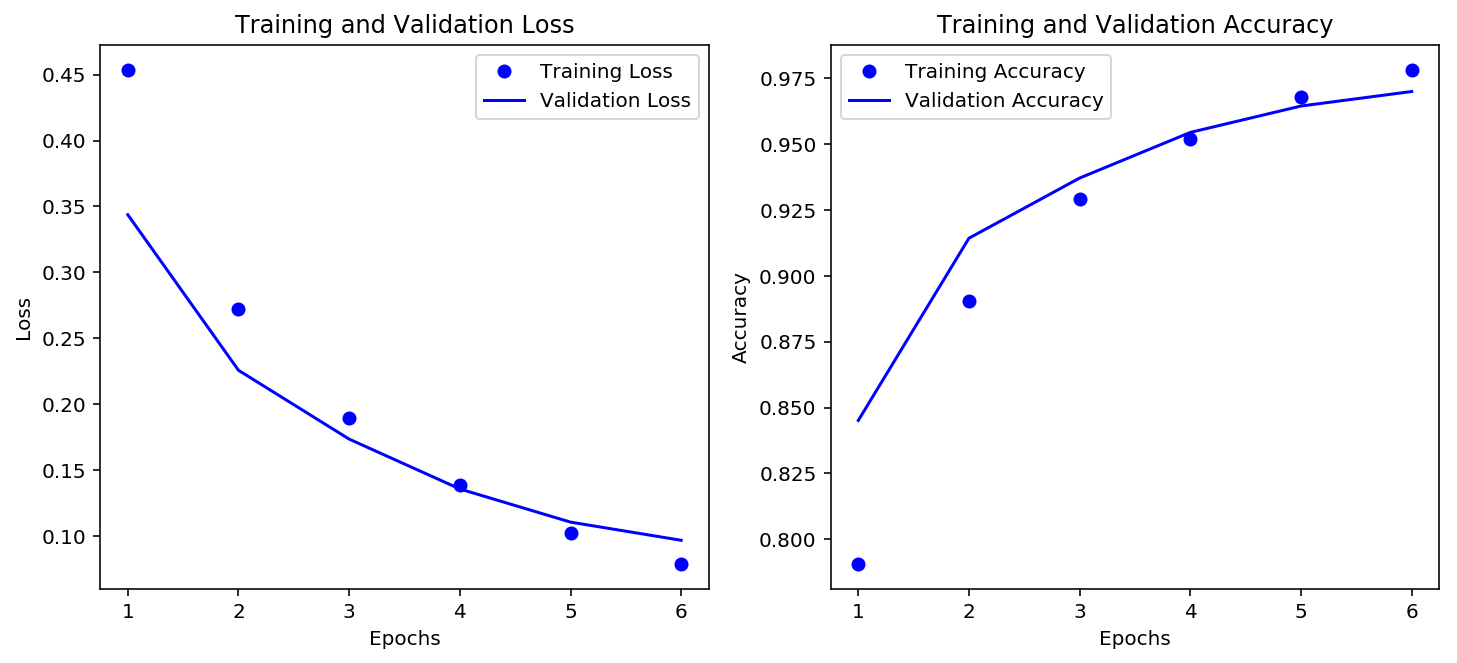

In [50]:
plot_loss_acc(hist_3_3)

***
Running the model independently, in order to save it

In [63]:
# hist_3_3 = run_model(64, 6, 512)
model = Sequential()

# input
model.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1], )))

# one hidden layer
model.add(Dense(64, activation = 'relu'))

# output layer
model.add(Dense(1, activation = 'sigmoid'))

# compile
model.compile(optimizer = 'adam', 
             loss = 'binary_crossentropy', 
             metrics = ['accuracy'])

history = model.fit(X_train, y_train,
               epochs = 6, 
               batch_size = 512, 
               validation_data = (X_test, y_test))

Train on 30000 samples, validate on 10000 samples
Epoch 1/6
30000/30000 [==============================] - 2s 52us/step - loss: 0.5007 - acc: 0.7526 - val_loss: 0.3685 - val_acc: 0.8332
Epoch 2/6
30000/30000 [==============================] - 0s 11us/step - loss: 0.2986 - acc: 0.8770 - val_loss: 0.2383 - val_acc: 0.9097
Epoch 3/6
30000/30000 [==============================] - 0s 11us/step - loss: 0.1992 - acc: 0.9282 - val_loss: 0.1743 - val_acc: 0.9397
Epoch 4/6
30000/30000 [==============================] - 1s 17us/step - loss: 0.1425 - acc: 0.9529 - val_loss: 0.1352 - val_acc: 0.9552
Epoch 5/6
30000/30000 [==============================] - 0s 11us/step - loss: 0.1070 - acc: 0.9667 - val_loss: 0.1122 - val_acc: 0.9655
Epoch 6/6
30000/30000 [==============================] - 0s 11us/step - loss: 0.0846 - acc: 0.9757 - val_loss: 0.0974 - val_acc: 0.9712


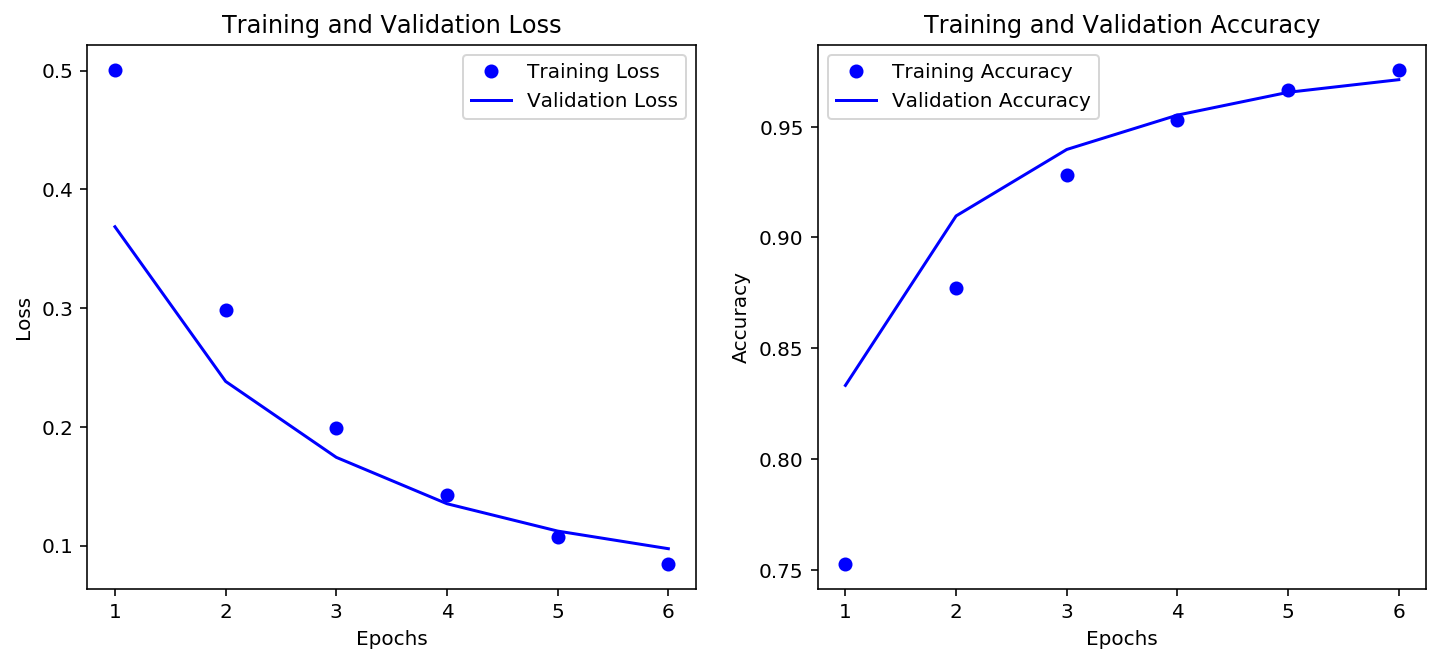

In [64]:
plot_loss_acc(history)

In [65]:
# saving it for later use
import pickle
filename = 'model_2_nn.sav'
pickle.dump(model, open(filename, 'wb'))